In [1]:
#-- Wide screen:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
#-- Auto reload:
%load_ext autoreload
%autoreload 2

In [3]:
!pip install torchinfo

In [4]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

import torch
import torchvision
import torchinfo

### Dogs vs. Cats:
* Download the data from:  
https://www.kaggle.com/shaunthesheep/microsoft-catsvsdogs-dataset
* Remove `Cat\666.jpg` and `Dog\11702.jpg` (bad files)
* Split your data into $22,500$ training images and $2,498$ validation images.
* Obtain at least $98\%$ classification accuracy.  
Try:
    * Your own network (e.g. a ResNet based architecture).
    * A pretrained network (using transfer learning).
    

**Tips:**  
* Load the data:
    * Dataset -- `torchvision.datasets.ImageFolder` and `torchvision.transforms`
    * Split -- `torch.utils.data.random_split`
    * Data loader -- `torch.utils.data.DataLoader`
* Model -- `torch.nn` or `torchvision.models`
* Set:
    * Device
    * Loss function (binary classification)
    * Optimizer
    * Scheduler (optional)
* Train you model!


In [5]:
if 'google.colab' in str(get_ipython()):
    !npx degit FixelAlgorithmsTeam/FixelCourses/DeepLearningMethods/08_CnnArchitectures/DeepLearningFramework ./DeepLearningFramework

In [6]:
from DeepLearningFramework.Training import TrainClassficationModel

In [7]:
# My own network

# https://www.fatalerrors.org/a/image-classification-of-cat-and-dog-war-using-resnet.html

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Using gpu: %s ' % torch.cuda.is_available())

Using gpu: True 


In [8]:
DATA_PATH = './PetImages/'

In [9]:
import os

def Clean_empty(path):
    """
    Iterate through all subfolders and subfiles under a file, cleaning up empty folders and files
    path:file path
    """
    
    for (dirpath,dirnames,filenames) in os.walk(path):
        for filename in filenames:
            file_folder=dirpath+'/'+filename
            # print(file_folder)
            if os.path.isdir(file_folder): 
                if not os.listdir(file_folder): 
                    print(file_folder)
                    # os.rmdir(dirpath+filename) 
            elif os.path.isfile(file_folder): 
                if os.path.getsize(file_folder) == 0: 
                    print(file_folder)
                    os.remove(file_folder)  
    print(path, 'clean over!')

In [10]:
# Clean zero length files

Clean_empty(DATA_PATH)

./PetImages/ clean over!


In [11]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils, datasets

oTensor_transform = transforms.Compose([
        transforms.Resize((224,224)),
        transforms.ToTensor()])

data_image_folder=datasets.ImageFolder(root=DATA_PATH, transform=oTensor_transform)

In [12]:
oTrain_dataset, oVal_dataset = torch.utils.data.random_split(data_image_folder, [22500, 2498])

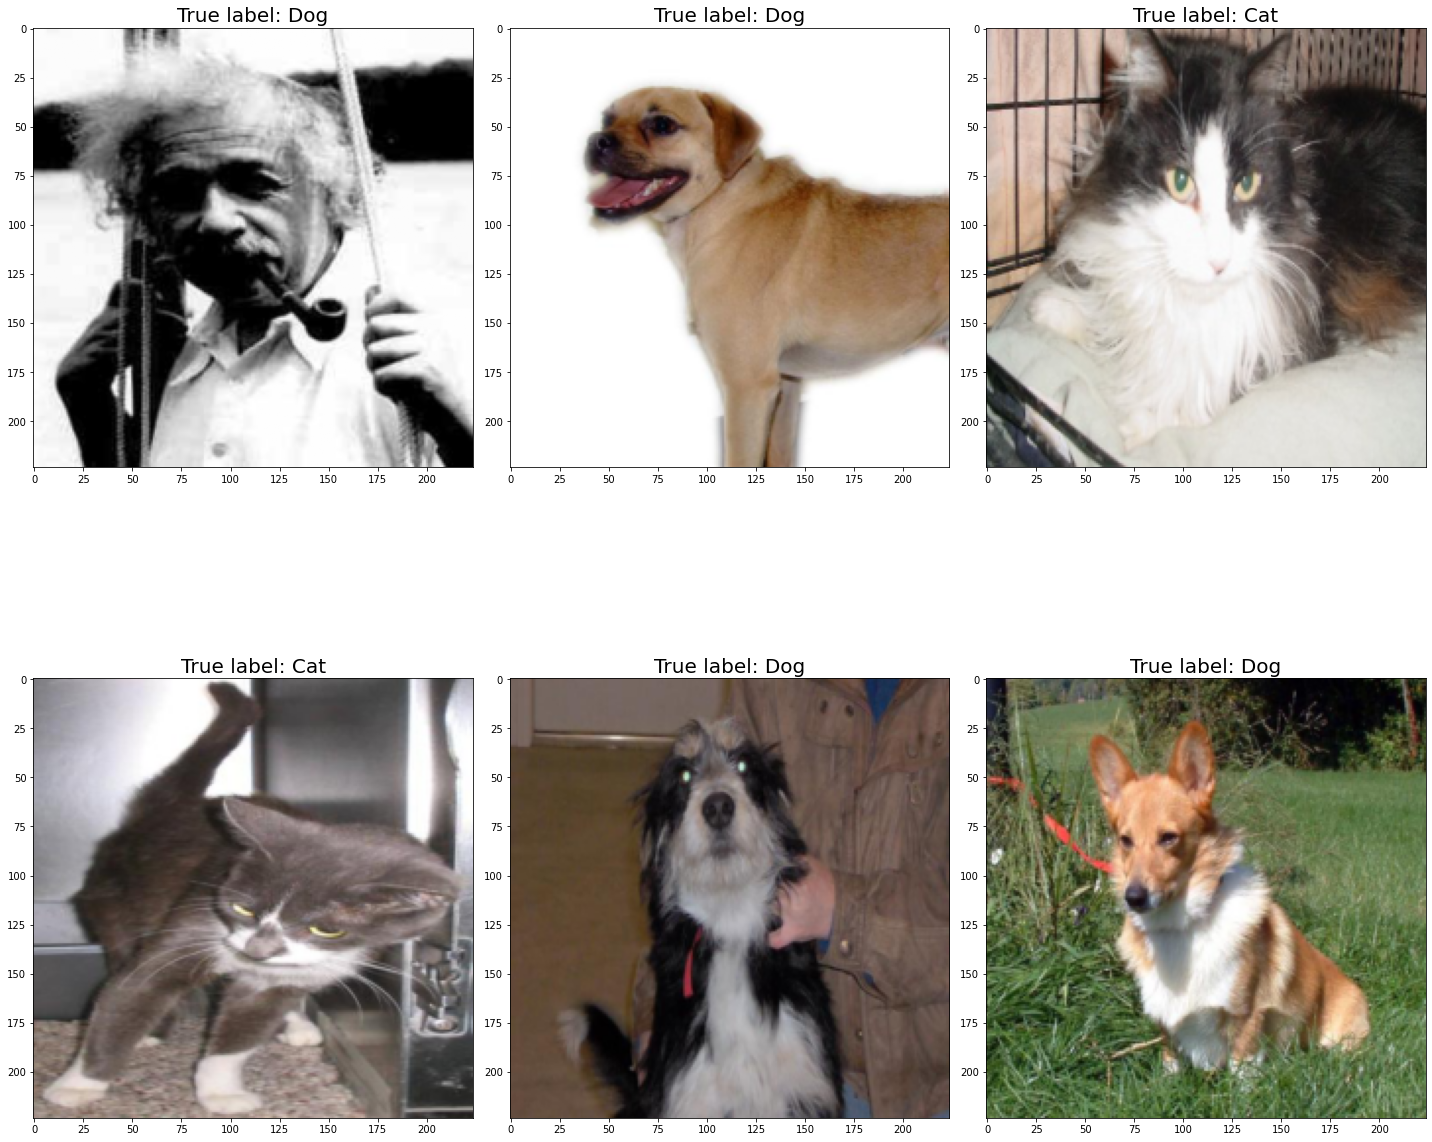

In [13]:
N = len(oTrain_dataset.dataset)
fig, _     = plt.subplots(2, 3, figsize=(20, 20))
for ax in fig.axes:
    idx   = np.random.randint(0, N)
    mX, y = oTrain_dataset.dataset[idx]
    ax.imshow   (np.transpose(mX.numpy(), (1,2,0)))
    ax.set_title(f'True label: {oTrain_dataset.dataset.classes[y]}', size=20)
    
plt.tight_layout()
plt.show()

In [14]:
batchSize = 64
oTrainDL  = torch.utils.data.DataLoader(oTrain_dataset, shuffle=True,  batch_size=1*batchSize, num_workers=2, persistent_workers=True)
oValDL   = torch.utils.data.DataLoader(oVal_dataset,  shuffle=False, batch_size=2*batchSize, num_workers=2, persistent_workers=True)

mX, vY    = next(iter(oTrainDL))
mX.shape

torch.Size([64, 3, 224, 224])

In [15]:
import torchvision.models as models
from torch.optim.lr_scheduler import OneCycleLR
import torch.optim            as optim
import torch.nn               as nn
from DeepLearningFramework.Auxiliary import PlotHistory

nEpochs = 30
nIter   = nEpochs * len(oTrainDL)
Loss    = nn.CrossEntropyLoss()
# Loss          = nn.Cro ()

In [16]:
oResNetFullTrain = torchvision.models.resnet50(pretrained=False).to(device)

oOptim        = optim.AdamW            (oResNetFullTrain.parameters(), lr=0, betas=(0.9, 0.99), weight_decay=2e-2)
oScheduler    = OneCycleLR             (oOptim, max_lr=1e-2, total_steps=nIter)
lHistory      = TrainClassficationModel(oResNetFullTrain, oTrainDL, oValDL, Loss, nEpochs, oOptim, oScheduler)


Epoch 000: | Train loss:  0.681 | Val loss:  0.578 | Train Accuracy:  0.639 | Val Accuracy:  0.712 | epoch time: 124.065 | <-- Checkpoint!
Epoch 001: | Train loss:  0.583 | Val loss:  0.674 | Train Accuracy:  0.701 | Val Accuracy:  0.641 | epoch time: 124.952 |
Epoch 002: | Train loss:  0.533 | Val loss:  0.832 | Train Accuracy:  0.738 | Val Accuracy:  0.631 | epoch time: 126.114 |
Epoch 003: | Train loss:  0.497 | Val loss:  0.498 | Train Accuracy:  0.764 | Val Accuracy:  0.758 | epoch time: 126.642 | <-- Checkpoint!
Epoch 004: | Train loss:  0.439 | Val loss:  0.499 | Train Accuracy:  0.799 | Val Accuracy:  0.788 | epoch time: 126.592 | <-- Checkpoint!
Epoch 005: | Train loss:  0.388 | Val loss:  0.505 | Train Accuracy:  0.831 | Val Accuracy:  0.810 | epoch time: 126.550 | <-- Checkpoint!
Epoch 006: | Train loss:  0.351 | Val loss:  0.428 | Train Accuracy:  0.849 | Val Accuracy:  0.805 | epoch time: 126.499 |
Epoch 007: | Train loss:  0.304 | Val loss:  0.524 | Train Accuracy:  0.872

/home/harelh/Eyal/project1/.venv/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/home/harelh/Eyal/project1/.venv/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))


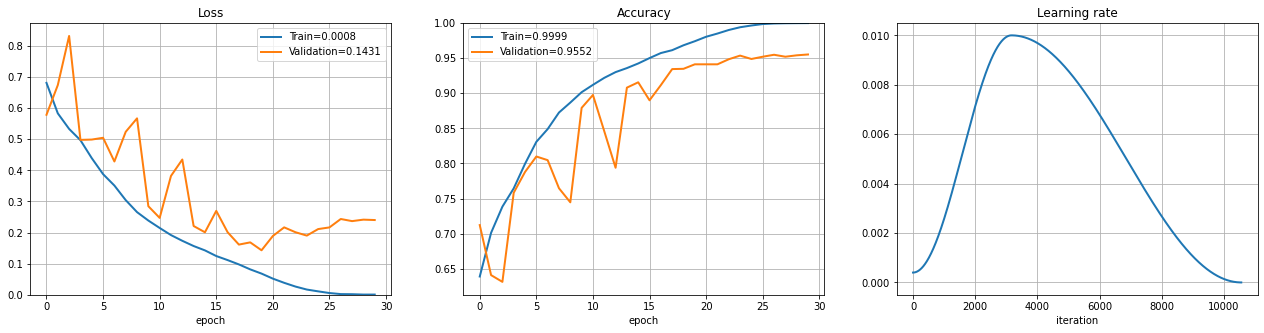

In [17]:
PlotHistory(lHistory)

In [18]:
batchSize = 64
oTrainDL  = torch.utils.data.DataLoader(oTrain_dataset, shuffle=True,  batch_size=1*batchSize, num_workers=2, persistent_workers=True)
oValDL   = torch.utils.data.DataLoader(oVal_dataset,  shuffle=False, batch_size=2*batchSize, num_workers=2, persistent_workers=True)

mX, vY    = next(iter(oTrainDL))
mX.shape

torch.Size([64, 3, 224, 224])

In [19]:
def GetPretrainedModel():
    oModel = torchvision.models.resnet50(pretrained=True)
    #-- freeze weights:
    for mParam in oModel.parameters():
        mParam.requires_grad = False
        
    #-- Replace classifier head:
    dIn       = oModel.fc.in_features
    oModel.fc = nn.Sequential(
        nn.Linear(dIn, 2),
    )
    
    return oModel

In [20]:
oResnetPretrained = GetPretrainedModel().to(device)

oOptim        = optim.AdamW            (oResnetPretrained.parameters(), lr=0, betas=(0.9, 0.99), weight_decay=2e-2)
oScheduler    = OneCycleLR             (oOptim, max_lr=1e-2, total_steps=nIter)
lHistory      = TrainClassficationModel(oResnetPretrained, oTrainDL, oValDL, Loss, nEpochs, oOptim, oScheduler)


Epoch 000: | Train loss:  0.108 | Val loss:  0.048 | Train Accuracy:  0.967 | Val Accuracy:  0.983 | epoch time: 45.297 | <-- Checkpoint!
Epoch 001: | Train loss:  0.059 | Val loss:  0.048 | Train Accuracy:  0.978 | Val Accuracy:  0.981 | epoch time: 44.967 |
Epoch 002: | Train loss:  0.065 | Val loss:  0.092 | Train Accuracy:  0.977 | Val Accuracy:  0.966 | epoch time: 44.951 |
Epoch 003: | Train loss:  0.078 | Val loss:  0.039 | Train Accuracy:  0.974 | Val Accuracy:  0.986 | epoch time: 44.973 | <-- Checkpoint!
Epoch 004: | Train loss:  0.085 | Val loss:  0.058 | Train Accuracy:  0.975 | Val Accuracy:  0.981 | epoch time: 44.922 |
Epoch 005: | Train loss:  0.102 | Val loss:  0.063 | Train Accuracy:  0.976 | Val Accuracy:  0.984 | epoch time: 45.044 |
Epoch 006: | Train loss:  0.136 | Val loss:  0.065 | Train Accuracy:  0.975 | Val Accuracy:  0.986 | epoch time: 45.045 | <-- Checkpoint!
Epoch 007: | Train loss:  0.159 | Val loss:  0.992 | Train Accuracy:  0.973 | Val Accuracy:  0.906

/home/harelh/Eyal/project1/.venv/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/home/harelh/Eyal/project1/.venv/lib/python3.8/site-packages/PIL/TiffImagePlugin.py:819: UserWarning: Truncated File Read
  warnings.warn(str(msg))


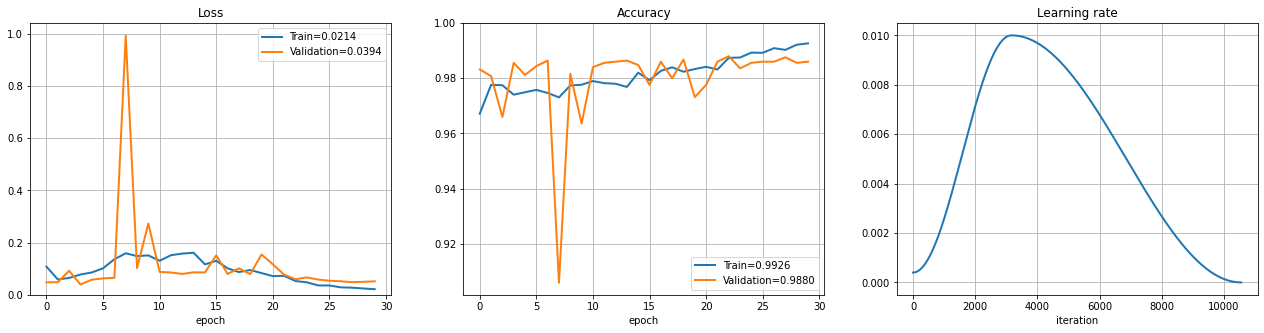

In [21]:
PlotHistory(lHistory)